# Boston Dataset
Predicting house sing Linear Regression

# Libraries and Dataset

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns #graphs
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/BostonHousing.csv')
df_norm = pd.read_csv('/content/BostonHousing.csv')

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.shape

(506, 14)

In [ ]:
print(df.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [ ]:
df.head() #first 5 rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.tail() #last 5 rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
print(df.info)

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [ ]:
datatype = df.dtypes
print("Output:")
print(datatype) #no categorical data found

Output:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


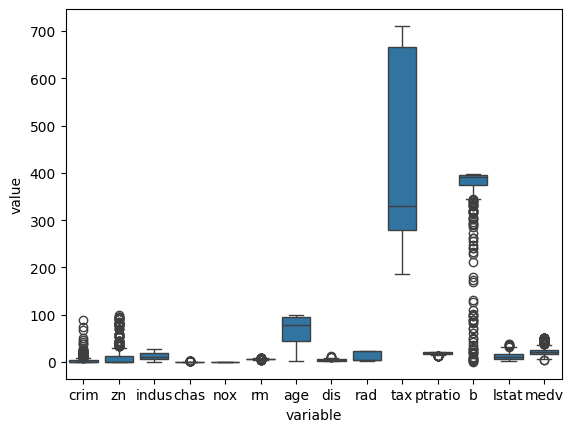

In [ ]:
#box plot - helps in detecting outliers
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [ ]:
#correlation
print(df.corr(numeric_only=True))

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

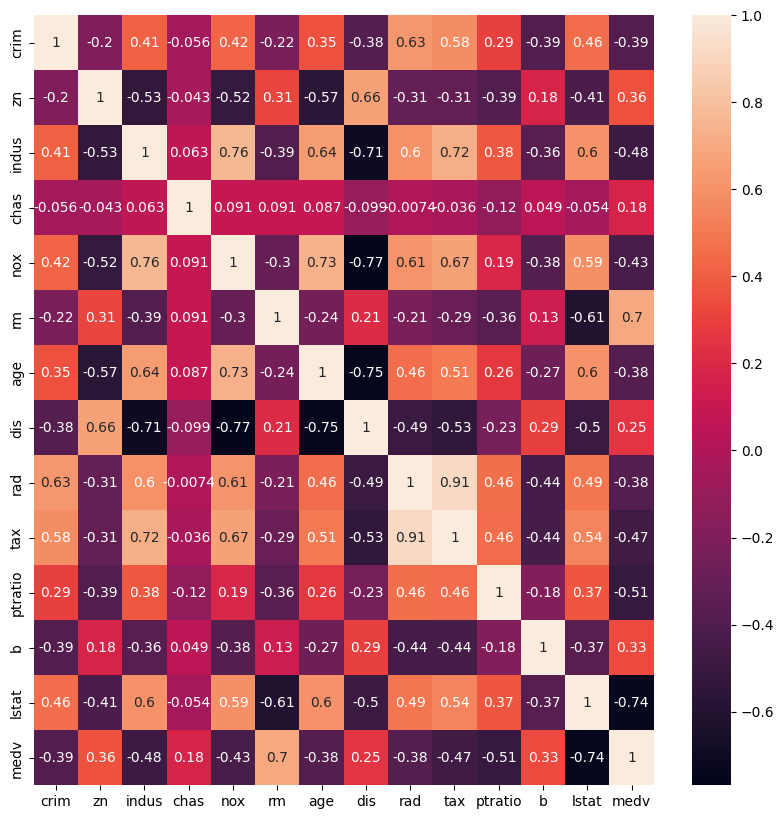

In [ ]:
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(df.corr(numeric_only=True) , annot=True)
plt.show()

In [ ]:
df.var()

,0
crim,73.986578
zn,543.936814
indus,47.064442
chas,0.064513
nox,0.013428
rm,0.493671
age,792.358399
dis,4.434015
rad,75.816366
tax,28404.759488


In [ ]:
#removing low variance features

variances = np.var(df, axis=0)
threshold = 0.1
low_var_indices = np.where(variances < threshold)
print(low_var_indices)

(array([3, 4]),)


In [ ]:
df_var = np.delete(df, low_var_indices, axis=1)

In [ ]:
df_var.shape

(506, 12)

In [ ]:
df = df.drop(df.columns[[3, 4]], axis=1)

In [ ]:
df

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Train and Test Split

In [ ]:
X = df.iloc[:, :-1]
X

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y = df.iloc[:, -1]
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


<Axes: xlabel='medv', ylabel='Density'>

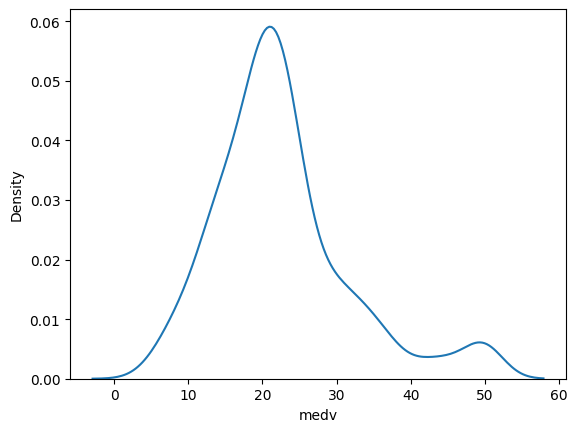

In [ ]:
sns.kdeplot(y)

# Outliers

In [ ]:
#Detecting number of outliers in each column

def detect_outliers(X):
    cols = list(X)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in X.select_dtypes(include=np.number).columns:
            q1 = X[column].quantile(0.25)
            q3 = X[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            num_outliers = X.loc[(X[column] < fence_low) | (X[column] > fence_high)].shape[0]
            outliers = pd.concat([outliers, pd.DataFrame({'Feature': [column], 'Number of Outliers': [num_outliers]})], ignore_index=True)
    return outliers

detect_outliers(X)

,Feature,Number of Outliers
0,crim,66
1,zn,68
2,indus,0
3,rm,30
4,age,0
5,dis,5
6,rad,0
7,tax,0
8,ptratio,15
9,b,77


In [ ]:
#removing outliers

from scipy.stats.mstats import winsorize

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))

    return dataframe


X = treat_outliers(X)

In [ ]:
def detect_outliers(X):
    cols = list(X)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in X.select_dtypes(include=np.number).columns:
            q1 = X[column].quantile(0.25)
            q3 = X[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            num_outliers = X.loc[(X[column] < fence_low) | (X[column] > fence_high)].shape[0]
            outliers = pd.concat([outliers, pd.DataFrame({'Feature': [column], 'Number of Outliers': [num_outliers]})], ignore_index=True)
    return outliers

detect_outliers(X)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Feature,Number of Outliers
0,crim,66
1,zn,68
2,indus,0
3,rm,0
4,age,0
5,dis,0
6,rad,0
7,tax,0
8,ptratio,0
9,b,77


# Test and Train Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) #to get same values all the time we set the random_state

In [ ]:
print(X_train)

         crim    zn  indus     rm   age     dis  rad  tax  ptratio       b  \
477  10.83420   0.0  18.10  5.593  97.3  2.1007   24  666     20.2  349.48   
15    0.62739   0.0   8.14  5.834  56.5  4.4986    4  307     20.9  395.62   
332   0.03768  35.0   6.06  6.031  26.3  6.6407    3  304     16.9  362.25   
423   7.05042   0.0  18.10  6.103  85.1  2.0218   24  666     20.2  288.99   
19    0.72580   0.0   8.14  5.727  69.5  3.7965    4  307     20.9  390.95   
..        ...   ...    ...    ...   ...     ...  ...  ...      ...     ...   
106   0.17120   0.0   8.56  5.836  91.9  2.2110    5  384     20.9  395.67   
270   0.29916  20.0   6.96  5.856  42.1  4.4290    3  233     18.6  388.65   
348   0.03768  45.0   2.89  6.635  29.7  6.8185    4  280     17.0  390.94   
435  10.83420   0.0  18.10  6.629  94.6  2.1247   24  666     20.2  288.99   
102   0.22876   0.0   8.56  6.405  85.4  2.7147    5  384     20.9  288.99   

     lstat  
477  23.09  
15    8.47  
332   7.83  
423  23.09 

In [ ]:
print(X_test)

         crim    zn  indus     rm   age     dis  rad  tax  ptratio       b  \
173   0.09178   0.0   4.05  6.416  84.1  2.6463    5  296     16.6  395.50   
274   0.05644  40.0   6.41  6.758  32.9  4.0776    4  254     17.6  396.90   
491   0.10574   0.0  19.58  5.983  98.8  1.8681    4  666     20.1  390.11   
72    0.09164   0.0  10.81  6.065  26.3  5.2873    4  305     19.2  390.91   
452   5.09017   0.0  18.10  6.297  91.8  2.3682   24  666     20.2  385.09   
..        ...   ...    ...    ...   ...     ...  ...  ...      ...     ...   
412  10.83420   0.0  18.10  5.593  98.8  1.6232   24  666     20.2  288.99   
436  10.83420   0.0  18.10  6.461  93.3  2.0026   24  666     20.2  288.99   
411  10.83420   0.0  18.10  6.657  98.8  1.6232   24  666     20.2  288.99   
86    0.05188   0.0   4.49  6.015  45.1  4.4272    3  247     18.5  395.99   
75    0.09512   0.0  12.83  6.286  45.0  4.5026    5  398     18.7  383.23   

     lstat  
173   9.04  
274   4.67  
491  18.07  
72    5.52 

In [ ]:
print(y_train)

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: medv, Length: 404, dtype: float64


In [ ]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: medv, Length: 102, dtype: float64


# Normalisation


In [ ]:
from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_test_scaled = min_max_scaler.transform(X_test)

std_scaler = preprocessing.StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# Model Training

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 24.035460471775476
R-squared: 0.672245731285553
Mean Absolute Error: 3.2378638822770385


In [ ]:
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_lr

,Actual,Predicted
173,23.6,30.401349
274,32.4,33.544567
491,13.6,13.373685
72,22.8,24.502779
452,16.1,19.263493
...,...,...
412,17.9,6.915117
436,9.6,15.216982
411,17.2,14.406037
86,22.5,21.081536


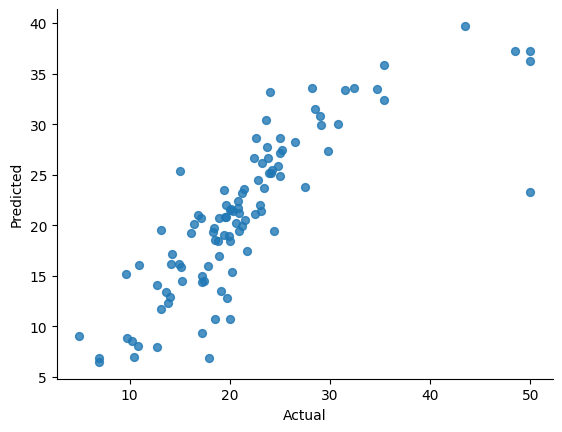

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
df_lr.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#SVM Regressor
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test_scaled)

In [ ]:
y_pred = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 23.46568731071527
R-squared: 0.6800153176413335
Mean Absolute Error: 2.703448026174034


In [ ]:
df_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_svr

,Actual,Predicted
173,23.6,26.077849
274,32.4,31.215718
491,13.6,17.236408
72,22.8,22.449390
452,16.1,17.084077
...,...,...
412,17.9,12.173304
436,9.6,13.155369
411,17.2,12.848242
86,22.5,21.651540


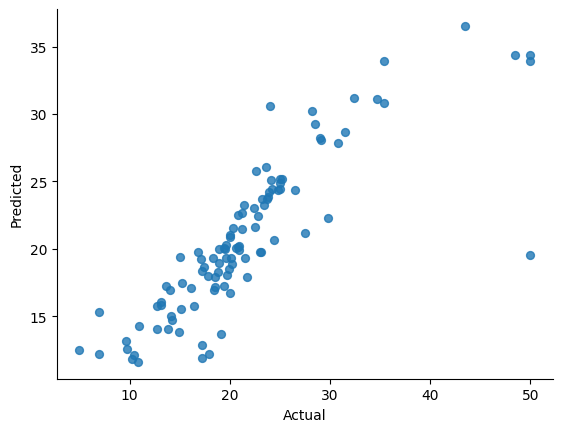

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
df_svr.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#RF Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=False)
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 12.15825683693852
R-squared: 0.8342066055646136
Mean Absolute Error: 2.4657136554621855


In [ ]:
df_rfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_rfr

,Actual,Predicted
173,23.6,23.048000
274,32.4,30.537000
491,13.6,16.607000
72,22.8,23.083000
452,16.1,17.469000
...,...,...
412,17.9,11.876429
436,9.6,13.262000
411,17.2,11.174000
86,22.5,20.408000


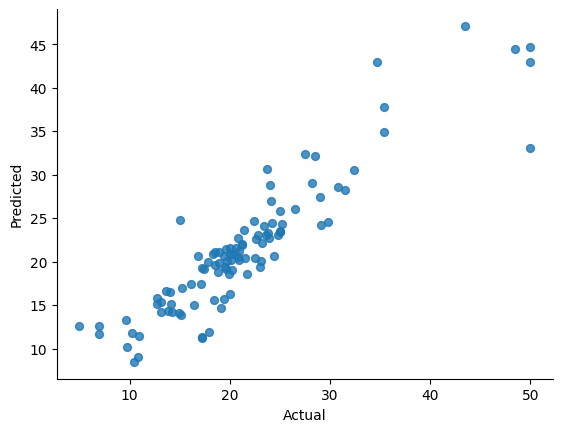

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
df_rfr.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)